In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from skimpy import skim
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

# Cargar el DataSet

In [3]:
df = pd.read_csv('../data/processed/coches_baratos_procc.csv')
df

,Brand_c,Price,Kilometers,Seats,Doors,Brand_Model_code,Car_Age,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c
0,0,5100.0,225282.0,7.0,5.0,0.205,12,1,0,1,0,0,1,1,0,5
1,0,1995.0,162076.0,4.0,5.0,0.181,15,2,1,0,0,0,0,0,1,2
2,0,2995.0,53914.0,4.0,5.0,0.181,19,2,1,0,0,0,0,0,0,2
3,0,1450.0,238642.0,5.0,5.0,0.030,19,2,1,0,0,0,0,0,0,2
4,0,8900.0,199000.0,5.0,5.0,0.354,8,1,1,4,0,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11403,30,54980.0,29652.0,2.0,2.0,30.425,9,0,1,0,0,0,1,1,0,4
11404,30,33600.0,91785.0,2.0,2.0,30.095,45,0,0,0,1,0,2,1,0,4
11405,30,15000.0,81000.0,2.0,2.0,30.095,54,1,1,0,1,0,1,1,13,4
11406,30,21800.0,85000.0,2.0,2.0,30.095,54,4,1,0,1,0,2,3,10,6


Hago uso de una función del paquete skimr para ver un resumen estadístico completo de mi DataFrame. Es como df.describe() de pandas pero mucho más detallado y visual.

In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11408  │ │ int64       │ 11    │                                                          │
│ │ Number of columns │ 16     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0     ┃ p25   ┃ p50   ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Brand_c            │   0 │     0 │    14.27 │   8.745 │      0 │     7 │    14 │     21 │      36 │ ████▆▁ │  │
│ │ Price              │   0 │     0 │    20030 │   11630 │    300 │ 11500 │ 18350 │  26800 │   60000 │ ▅█▆▂▁  │  │
│ │ Kilometers         │   0 │     0 │    86350 │   74000 │      0 │ 30640 │ 72280 │ 125000 │ 2014000 │   █    │  │
│ │ Seats              │   0 │     0 │    4.967 │  0.6676 │      1 │     5 │     5 │      5 │       9 │    ▁█  │  │
│ │ Doors              │   0 │     0 │    4.603 │  0.8085 │      2 │     4 │     5 │      5 │      35 │   █    │  │
│ │ Brand_Model_code   │   0 │     0 │    14.58 │   8.698 │  0.001 │ 7.268 │ 14.56 │     22 │      36 │ ████▆▁ │  │
│ │ Car_Age            │   0 │     0 │    7.641 │   7.215 │      0 │     3 │     6 │     10 │      79 │   █▁   │  │
│ │ Country_c          │   0 │     0 │    1.134 │   1.358 │      0 │     0 │     1 │      2 │       7 │  █▂▁   │  │
│ │ Gearbox_c          │   0 │     0 │   0.4464 │  0.5163 │      0 │     0 │     0 │      1 │       2 │  █  ▆  │  │
│ │ Fuel_c             │   0 │     0 │    0.882 │   1.146 │      0 │     0 │     1 │      1 │       9 │  █▁▁   │  │
│ │ Seller_c           │   0 │     0 │  0.01911 │  0.1369 │      0 │     0 │     0 │      0 │       1 │   █    │  │
│ │ Type_c             │   0 │     0 │    0.216 │  0.7703 │      0 │     0 │     0 │      0 │       5 │   █    │  │
│ │ Drivetrain_c       │   0 │     0 │   0.3963 │  0.6103 │      0 │     0 │     0 │      1 │       2 │ █  ▃ ▁ │  │
│ │ Upholstery_c       │   0 │     0 │   0.7991 │   1.097 │      0 │     0 │     0 │      1 │       5 │  █▄▂▁  │  │
│ │ Color_c            │   0 │     0 │    1.868 │   2.096 │      0 │     0 │     1 │      3 │      13 │  █▂▁   │  │
│ │ Body_Type_c        │   0 │     0 │     1.32 │   1.675 │      0 │     0 │     1 │      2 │       8 │  █▁▁▁  │  │
│ └────────────────────┴─────┴───────┴──────────┴─────────┴────────┴───────┴───────┴────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11408 entries, 0 to 11407
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_c           11408 non-null  int64  
 1   Price             11408 non-null  float64
 2   Kilometers        11408 non-null  float64
 3   Seats             11408 non-null  float64
 4   Doors             11408 non-null  float64
 5   Brand_Model_code  11408 non-null  float64
 6   Car_Age           11408 non-null  int64  
 7   Country_c         11408 non-null  int64  
 8   Gearbox_c         11408 non-null  int64  
 9   Fuel_c            11408 non-null  int64  
 10  Seller_c          11408 non-null  int64  
 11  Type_c            11408 non-null  int64  
 12  Drivetrain_c      11408 non-null  int64  
 13  Upholstery_c      11408 non-null  int64  
 14  Color_c           11408 non-null  int64  
 15  Body_Type_c       11408 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 1

Usando un boxplot muestro como estan los precios de mi DataFrame. de aqui podemos sacar los siguientes conclusiones:
- La caja IQR esta por dejabo de la mitad del los precios más altos lo que significa que la mayoria de los precios son bajos, con algunos valores atípicos altos.
- La mediana está más cerca de la parte inferior de la caja y esto quiere decir que hay más valores bajos.
- Se pueden observar puntos por encima de 50000, y estos son mayormente los coches nuevos.
- La mayoría de los precios son bajos (mediana ~18000), pero hay una dispersión considerable y algunos productos extremadamente caros (outliers >50000), lo que sugiere una distribución asimétrica con sesgo positivo.

<Axes: ylabel='Price'>

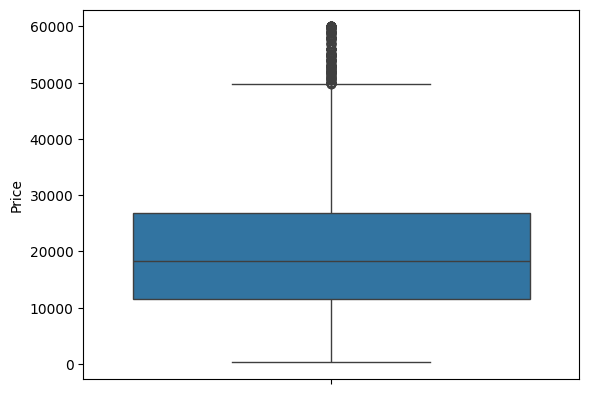

In [6]:
sns.boxplot(df['Price'])

## Preparar el X e y, dividir en train y test

In [7]:
X = df.drop(columns = ['Price'])
y = df['Price']

In [8]:
X

,Brand_c,Kilometers,Seats,Doors,Brand_Model_code,Car_Age,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c
0,0,225282.0,7.0,5.0,0.205,12,1,0,1,0,0,1,1,0,5
1,0,162076.0,4.0,5.0,0.181,15,2,1,0,0,0,0,0,1,2
2,0,53914.0,4.0,5.0,0.181,19,2,1,0,0,0,0,0,0,2
3,0,238642.0,5.0,5.0,0.030,19,2,1,0,0,0,0,0,0,2
4,0,199000.0,5.0,5.0,0.354,8,1,1,4,0,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11403,30,29652.0,2.0,2.0,30.425,9,0,1,0,0,0,1,1,0,4
11404,30,91785.0,2.0,2.0,30.095,45,0,0,0,1,0,2,1,0,4
11405,30,81000.0,2.0,2.0,30.095,54,1,1,0,1,0,1,1,13,4
11406,30,85000.0,2.0,2.0,30.095,54,4,1,0,1,0,2,3,10,6


Dividir los datos en test y train usando 70% de los registros para aprender y dejando 30% para testear.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [10]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (11408, 15)
Train features shape: (7985, 15)
Train target shape: (7985,)
Test features shape: (3423, 15)
Test target shape: (3423,)


# Linear Regression
Probar con el modelo más simple

In [11]:
lm = LinearRegression()
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Veamos los coeficientes del modelo Linear Regression

In [12]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Brand_c,-10783.108527
Kilometers,-0.057304
Seats,174.961706
Doors,-1103.970443
Brand_Model_code,11340.398817
Car_Age,-412.270248
Country_c,407.993226
Gearbox_c,-3625.133407
Fuel_c,171.114708
Seller_c,-735.250307


### Conclusiones del análisis de coeficientes del modelo Linear Regression
+ Brand_Model_code (+11340):
    El código específico del modelo tiene un efecto enorme en el precio. Esto sugiere que modelos premium o específicos mantienen mucho valor.
+ Drivetrain_c (+3570):
    netarias por cierta categoría, probablemente 4x4 vs tracción delantera).

 Variables con impacto negativo fuerte:
+ Kilometers (–0.057):
Por cada kilómetro adicional, el precio baja ~0.057 unidades. Aunque el coeficiente es pequeño, en escala (ej. 100000 km) implica –5700 unidades de precio.
+ Car_Age (–412):
Por cada año de antigüedad, el precio baja ~412 unidades.
+ Gearbox_c (–3625):
El tipo de caja (manual vs automática) tiene un efecto importante. Los manuales valen menos.
+ Doors (–1104):
Curiosamente, más puertas se asocia con menor precio. Podría deberse a que modelos más grandes/familiares (5 puertas) son menos premium que cupés (3 puertas).

In [13]:
predictions = lm.predict(X_test)
predictions

array([ 5691.75207526, 21183.99354926, 19007.19751754, ...,
        8549.62253769,  4257.12103576, 29849.09820392], shape=(3423,))

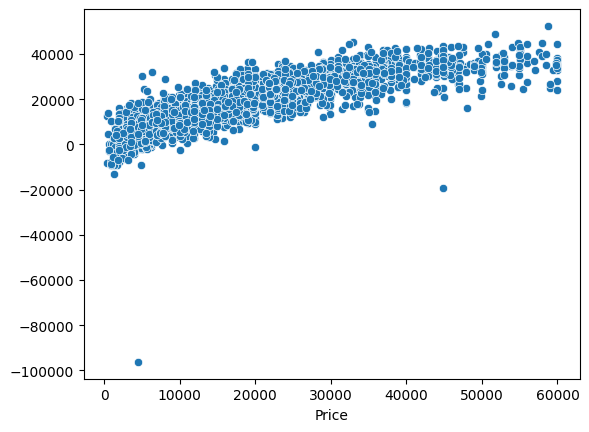

In [14]:
sns.scatterplot(x = y_test, y = predictions);

In [15]:
print('EVALUACIÓN DE LAS METRICAS')
print('=' *40)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', metrics.root_mean_squared_error(y_test, predictions))
print('R2:' , metrics.r2_score(y_test, predictions))

EVALUACIÓN DE LAS METRICAS
MAE: 4729.037051728572
MSE: 45158989.716713786
RMSE: 6720.043877588433
R2: 0.6665591285740139


Guarda el modelo en un fichero pkl.

In [16]:
pickle.dump(lm, open("../models/Linear_Regression_model.pkl", "wb"))

Analisar los outliers:

In [17]:
residuals = y_test - predictions

# Identificar outliers
std_residuals = np.std(residuals)
outlier_threshold = 3 * std_residuals
outlier_indices = np.where(np.abs(residuals) > outlier_threshold)[0]

print("ANÁLISIS DE OUTLIERS")
print(f"Desviación estándar de residuos: {std_residuals:.4f}")
print(f"Umbral de outlier: ±{outlier_threshold:.4f}")
print(f"Número de outliers identificados: {len(outlier_indices)}")
print(f"Índices de outliers: {outlier_indices}")

ANÁLISIS DE OUTLIERS
Desviación estándar de residuos: 6719.5991
Umbral de outlier: ±20158.7973
Número de outliers identificados: 48
Índices de outliers: [  64   86  110  300  336  585  630  638  664  701  716  767  827  909
  986 1037 1059 1139 1260 1417 1433 1575 1683 1792 1864 1879 1957 2006
 2038 2077 2161 2387 2413 2428 2449 2471 2680 2837 2868 3002 3050 3116
 3166 3185 3248 3288 3310 3403]


Intentando borrar los outliers encontrados y reentrenar el modelo.

In [ ]:
X_train_clean = X_train.copy()
y_train_clean = y_train.copy()

# Identificar outliers en entrenamiento también
train_pred = lm.predict(X_train)
train_residuals = y_train - train_pred
train_outliers = np.where(np.abs(train_residuals) > outlier_threshold)[0]

if len(train_outliers) > 0:
    print(f"Eliminando {len(train_outliers)} outliers del entrenamiento")
    X_train_clean = np.delete(X_train, train_outliers, axis=0)
    y_train_clean = np.delete(y_train, train_outliers, axis=0)
    
    # Reentrenar modelo
    model_clean = LinearRegression()
    model_clean.fit(X_train_clean, y_train_clean)
    
    # Nueva evaluación
    y_pred_clean = model_clean.predict(X_test)
    mse_clean = metrics.mean_squared_error(y_test, y_pred_clean)
    mae_clean = metrics.mean_absolute_error(y_test, y_pred_clean)
    print(f"Nuevo MSE: {mse_clean:.4f}, MAE: {mae_clean:.4f}")


 Eliminando 113 outliers del entrenamiento
Nuevo MSE: 45578905.2086, MAE: 4669.6698


El modelo ha mejorado de un MAE: 4729.037 a 4669.669, pero sigue siendo muy alto.

# Ridge, Lasso, Elastic Net

In [19]:
# Escalar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression (L2)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression (L1)
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

#. ElasticNet (combinación L1 + L2)
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

print("COMPARACIÓN CON REGULARIZACIÓN:")
for name, pred in [('Ridge', y_pred_ridge), 
                   ('Lasso', y_pred_lasso), 
                   ('ElasticNet', y_pred_elastic)]:
    mae = metrics.mean_absolute_error(y_test, pred)
    mse = metrics.mean_squared_error(y_test, pred)
    r2 = metrics.r2_score(y_test, pred)
    print(f"{name:12} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

COMPARACIÓN CON REGULARIZACIÓN:
Ridge        - MSE: 45767806.5754, R²: 0.6621, MAE: 4731.5794
Lasso        - MSE: 45160376.3629, R²: 0.6665, MAE: 4728.6709
ElasticNet   - MSE: 50353650.3897, R²: 0.6282, MAE: 4970.6864


In [20]:
pickle.dump(ridge, open("../models/Ridge_model.pkl", "wb"))
pickle.dump(lasso, open("../models/Lasso_model.pkl", "wb"))
pickle.dump(elastic, open("../models/Elastic_Net_model.pkl", "wb"))

# Random Forest, Gradient Boosting, Decision Tree

In [21]:
# 1. Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2. Gradient Boosting
gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# 3. Decision Tree
tree = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("COMPARACIÓN CON MODELOS DE ENSEMBLE:")
ensemble_results = {
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'Decision Tree': y_pred_tree
}

for name, pred in ensemble_results.items():
    mse = metrics.mean_squared_error(y_test, pred)
    r2 = metrics.r2_score(y_test, pred)
    mae = metrics.mean_absolute_error(y_test, pred)
    
    print(f"{name:20} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

COMPARACIÓN CON MODELOS DE ENSEMBLE:
Random Forest        - MSE: 22287592.5396, R²: 0.8354, MAE: 3247.8178
Gradient Boosting    - MSE: 18343230.2455, R²: 0.8646, MAE: 2900.5219
Decision Tree        - MSE: 31224873.2327, R²: 0.7694, MAE: 3772.6645


In [22]:
pickle.dump(rf, open("../models/Random_Forest_model.pkl", "wb"))
pickle.dump(gb, open("../models/Gradient_Boosting_model.pkl", "wb"))
pickle.dump(tree, open("../models/Decision_Tree_model.pkl", "wb"))

# Gradient Boosting mejorado

In [23]:
# Configuración mejorada
gb_better = GradientBoostingRegressor(
    n_estimators=300,           # ↑ Más árboles
    learning_rate=0.08,         # ↓ Tasa de aprendizaje más baja
    max_depth=6,                # ↑ Profundidad moderada
    min_samples_split=10,       # Evitar sobreajuste
    min_samples_leaf=5,         # Regularización
    subsample=0.8,              # Stochastic Gradient Boosting
    max_features='sqrt',        # Usar sqrt(n_features) en cada split
    random_state=42,
    n_iter_no_change=10,        # Parada temprana
    validation_fraction=0.1     # Fracción para validación
)
gb_better.fit(X_train, y_train)
y_pred_gb = gb_better.predict(X_test)

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gb))
print('RMSE:', metrics.root_mean_squared_error(y_test, y_pred_gb))
print('R2:' , metrics.r2_score(y_test, y_pred_gb))

MAE: 2642.965690331634
MSE: 15561487.019455312
RMSE: 3944.805067358248
R2: 0.8850984969991277


In [25]:
pickle.dump(gb_better, open("../models/GB_improved_model.pkl", "wb"))

# Gradient Boosting con GridSearch

In [26]:
param_dist = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 8),
    'min_samples_split': randint(10, 30),
    'min_samples_leaf': randint(4, 20),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['sqrt', 'log2', 0.5, 0.7]
}

gb = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(X_train, y_train)

print(f"\n🏆 MEJORES PARÁMETROS:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

    
best_model = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits

🏆 MEJORES PARÁMETROS:
  learning_rate: 0.08861954493335208
  max_depth: 5
  max_features: 0.5
  min_samples_leaf: 5
  min_samples_split: 10
  n_estimators: 383
  subsample: 0.9006772178989298


In [27]:
bgrs_pred = best_model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, bgrs_pred))

MAE: 2523.6007846211055


In [28]:
pickle.dump(best_model, open("../models/GB_withGS_model.pkl", "wb"))

# Pipeline

In [29]:
pipeline = Pipeline([
    ('feature_selection', SelectKBest(f_regression, k=20)), 
    ('regressor', GradientBoostingRegressor(
        n_estimators=150,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    ))
])

pipe_params = {
    'feature_selection__k': [15, 20, 25],
    'regressor__n_estimators': [100, 150],
    'regressor__max_depth': [3, 4]
}

grid_search = GridSearchCV(
    pipeline,
    pipe_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Entrenar con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Ver mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (R²):", grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros: {'feature_selection__k': 15, 'regressor__max_depth': 4, 'regressor__n_estimators': 150}
Mejor score (R²): 0.8521435513128294


In [30]:
gs_pred = grid_search.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, gs_pred))

MAE: 2950.980821753068


In [31]:
pickle.dump(grid_search, open("../models/GB_withPipe_model.pkl", "wb"))

# Light Gradient Boosting

In [32]:
# Dataset de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parámetros
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'verbose': -1,
    'random_state': 42
}

# Entrenar
print("\n🚀 Probando LightGBM...")
model_lgb = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=3000,
    callbacks=[lgb.early_stopping(200), lgb.log_evaluation(100)]
)


🚀 Probando LightGBM...
Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 2958.51
[200]	valid_0's l1: 2701.45
[300]	valid_0's l1: 2593.11
[400]	valid_0's l1: 2529.72
[500]	valid_0's l1: 2492.92
[600]	valid_0's l1: 2466.74
[700]	valid_0's l1: 2448.12
[800]	valid_0's l1: 2423.86
[900]	valid_0's l1: 2418.61
[1000]	valid_0's l1: 2401.9
[1100]	valid_0's l1: 2392.44
[1200]	valid_0's l1: 2389.15
[1300]	valid_0's l1: 2383.44
[1400]	valid_0's l1: 2374.71
[1500]	valid_0's l1: 2369.25
[1600]	valid_0's l1: 2362.39
[1700]	valid_0's l1: 2360.24
[1800]	valid_0's l1: 2358.2
[1900]	valid_0's l1: 2356.52
[2000]	valid_0's l1: 2352.44
[2100]	valid_0's l1: 2354.31
[2200]	valid_0's l1: 2352.21
[2300]	valid_0's l1: 2354.52
[2400]	valid_0's l1: 2355.25
Early stopping, best iteration is:
[2235]	valid_0's l1: 2351.19


In [33]:
y_pred_lgb = model_lgb.predict(X_test)

In [34]:
mae = metrics.mean_absolute_error(y_test, y_pred_lgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgb))
r2 = metrics.r2_score(y_test, y_pred_lgb)

print(f" RESULTADOS LightGBM:")
print(f"  MAE: €{mae:,.0f}")
print(f"  RMSE: €{rmse:,.0f}")
print(f"  R²: {r2:.4f}")

 RESULTADOS LightGBM:
  MAE: €2,351
  RMSE: €3,683
  R²: 0.8999


In [84]:
pickle.dump(model_lgb, open("../models/LightGB_model.pkl", "wb"))

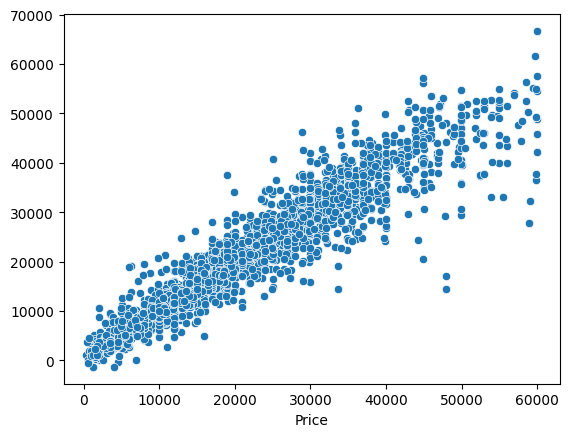

In [85]:
sns.scatterplot(x = y_test, y = y_pred_lgb);

# XGBoost

In [35]:
# Convertir a formato DMatrix (óptimo para XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros optimizados
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'n_jobs': -1
}

# Entrenar con early stopping
print("🚀 Probando XGBoost...")
model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=3000,
    evals=[(dtest, 'test')],
    early_stopping_rounds=200,
    verbose_eval=100
)

🚀 Probando XGBoost...
[0]	test-mae:8827.70910


[100]	test-mae:3003.51125
[200]	test-mae:2740.06868
[300]	test-mae:2623.70405
[400]	test-mae:2545.15850
[500]	test-mae:2493.62609
[600]	test-mae:2458.10199
[700]	test-mae:2431.92604
[800]	test-mae:2409.62520
[900]	test-mae:2394.96757
[1000]	test-mae:2383.84228
[1100]	test-mae:2374.85850
[1200]	test-mae:2367.10212
[1300]	test-mae:2361.52004
[1400]	test-mae:2356.00516
[1500]	test-mae:2352.43301
[1600]	test-mae:2349.17865
[1700]	test-mae:2351.46663
[1800]	test-mae:2350.43623
[1807]	test-mae:2350.19797


In [87]:
# Convertir a formato DMatrix el X_test tambien
dtest = xgb.DMatrix(X_test)
y_pred_xgb = model_xgb.predict(dtest)

In [88]:
mae = metrics.mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2 = metrics.r2_score(y_test, y_pred_xgb)

print(f"📊 RESULTADOS XGBoost:")
print(f"  MAE: €{mae:,.0f}")
print(f"  RMSE: €{rmse:,.0f}")
print(f"  R²: {r2:.4f}")

📊 RESULTADOS XGBoost:
  MAE: €2,350
  RMSE: €3,717
  R²: 0.8980


In [98]:
pickle.dump(model_xgb, open("../models/XGBoost_model.pkl", "wb"))
pickle.dump(model_xgb, open("../models/best_models/XGB_baratos_model.pkl", "wb"))

In [90]:
# Probar con un coche en concreto
feature_names = [
    'Brand_c', 'Kilometers',  'Seats', 'Doors', 
    'Brand_Model_code', 'Car_Age','Country_c', 'Gearbox_c', 'Fuel_c', 
    'Seller_c', 'Type_c', 'Drivetrain_c', 'Upholstery_c', 
    'Color_c', 'Body_Type_c'
]
mi_coche = [10, 234000.0, 12, 5, 5, 10.122, 5, 1, 1, 1, 0, 0, 0, 12, 3]
mi_coche_array = np.array(mi_coche).reshape(1, -1)
mi_coche_dmatrix = xgb.DMatrix(mi_coche_array, feature_names=feature_names)
precio = model_xgb.predict(mi_coche_dmatrix)
precio

array([8924.239], dtype=float32)

In [92]:
results = pd.DataFrame({'y_test': y_test, 'pred_LGBM': y_pred_lgb, 'pred_xgb': y_pred_xgb})
results.head(10)

,y_test,pred_LGBM,pred_xgb
6615,5750.0,7665.997293,7077.291992
2471,22838.0,22984.653670,22725.574219
4387,16900.0,17999.230367,18659.562500
5066,19890.0,17855.278553,16226.704102
1713,13500.0,12851.300715,13009.577148
1139,21300.0,19055.755485,19324.083984
5452,19490.0,19116.172988,20806.203125
5151,21480.0,24257.962536,24148.828125
4353,4995.0,4688.568894,4628.195312
5459,19689.0,16319.569923,17429.292969


In [96]:
mae = 2350
precio_min = df['Price'].min()
precio_max = df['Price'].max()
precio_promedio_estimado = np.mean([precio_min, precio_max])

# Calcular error relativo
error_relativo_porcentaje = (mae / precio_promedio_estimado) * 100

print("ANÁLISIS CON RANGO €300-€60,000")
print("="*60)
print(f"• Rango de precios: €{precio_min:,} - €{precio_max:,}")
print(f"• Precio promedio estimado: €{precio_promedio_estimado:,.0f}")
print(f"• Error absoluto (MAE): €{mae:,}")
print(f"• Error relativo: {error_relativo_porcentaje:.1f}% del precio promedio")

ANÁLISIS CON RANGO €300-€60,000
• Rango de precios: €300.0 - €60,000.0
• Precio promedio estimado: €30,150
• Error absoluto (MAE): €2,350
• Error relativo: 7.8% del precio promedio


# Modelo NO Supervisado

In [36]:
# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering para crear segmentos
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['segmento_mercado'] = kmeans.fit_predict(X_scaled)

# PCA para reducir ruido
pca = PCA(n_components=0.9)
pca_features = pca.fit_transform(X_scaled)

# Crear nuevo DataFrame con todo
X_enhanced = pd.DataFrame(X_scaled, columns=X.columns)
for i in range(pca.n_components_):
    X_enhanced[f'pca_{i}'] = pca_features[:, i]

X_enhanced['segmento'] = df['segmento_mercado']
X_enhanced['dist_centroide'] = kmeans.transform(X_scaled).min(axis=1)

# Calcular distancia a cada centroide
distances = kmeans.transform(X_scaled)
for i in range(kmeans.n_clusters):
    X_enhanced[f'dist_centroide_{i}'] = distances[:, i]

# Modelo supervisado final
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42
)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 6. Parámetros de XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'n_jobs': -1
}

model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=3000,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=200,
    verbose_eval=100
)

# Evaluación
y_pred = model_xgb.predict(dtest)
print("Resultados del modelo híbrido:")
print(f"R²: {metrics.r2_score(y_test, y_pred):.4f}")
print(f"Error medio absoluto: ${metrics.mean_absolute_error(y_test, y_pred):,.2f}")
    

[0]	train-mae:8890.19286	test-mae:8699.90160
[100]	train-mae:2498.88062	test-mae:2927.07319
[200]	train-mae:2043.05009	test-mae:2716.72356
[300]	train-mae:1769.65193	test-mae:2616.98843
[400]	train-mae:1554.09960	test-mae:2556.32695
[500]	train-mae:1382.54731	test-mae:2519.07184
[600]	train-mae:1230.40378	test-mae:2486.24591
[700]	train-mae:1110.03085	test-mae:2473.90931
[800]	train-mae:1004.02387	test-mae:2453.93672
[900]	train-mae:910.34568	test-mae:2442.89123
[1000]	train-mae:828.02600	test-mae:2437.90426
[1100]	train-mae:757.23083	test-mae:2430.28539
[1200]	train-mae:690.05050	test-mae:2421.54123
[1300]	train-mae:631.26356	test-mae:2417.48644
[1400]	train-mae:576.51349	test-mae:2412.81694
[1500]	train-mae:530.58481	test-mae:2410.99671
[1600]	train-mae:488.07934	test-mae:2407.33895
[1700]	train-mae:449.88504	test-mae:2404.69267
[1800]	train-mae:414.29464	test-mae:2403.89596
[1900]	train-mae:382.79698	test-mae:2401.41908
[2000]	train-mae:353.68535	test-mae:2399.56582
[2100]	train-mae

In [ ]:
pickle.dump(model_xgb, open("../models/XGB_NoSuperv_model.pkl", "wb"))

In [52]:
df

,Brand_c,Price,Kilometers,Seats,Doors,Brand_Model_code,Car_Age,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c,segmento_mercado
0,0,5100.0,225282.0,7.0,5.0,0.205,12,1,0,1,0,0,1,1,0,5,3
1,0,1995.0,162076.0,4.0,5.0,0.181,15,2,1,0,0,0,0,0,1,2,3
2,0,2995.0,53914.0,4.0,5.0,0.181,19,2,1,0,0,0,0,0,0,2,3
3,0,1450.0,238642.0,5.0,5.0,0.030,19,2,1,0,0,0,0,0,0,2,3
4,0,8900.0,199000.0,5.0,5.0,0.354,8,1,1,4,0,0,0,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11403,30,54980.0,29652.0,2.0,2.0,30.425,9,0,1,0,0,0,1,1,0,4,5
11404,30,33600.0,91785.0,2.0,2.0,30.095,45,0,0,0,1,0,2,1,0,4,1
11405,30,15000.0,81000.0,2.0,2.0,30.095,54,1,1,0,1,0,1,1,13,4,1
11406,30,21800.0,85000.0,2.0,2.0,30.095,54,4,1,0,1,0,2,3,10,6,1
